# Lamin-A/C (LMNA)

The [LMNA gene](https://omim.org/entry/150330#geneMap) encodes for lamin A and lamin C, which together (with the addition of lamin B) create the nuclear lamina, which is essential to determining the nuclear size and shape from underneath the inner nuclear membrane. They are also found to be essential for nuclear growth, DNA replication, and apoptosis ([Gruenbaum et al. (2000)](https://pubmed.ncbi.nlm.nih.gov/10806082/)). 

There are 11 different syndromes that are associated with variants on LMNA. The five that we focus on in this analysis are all autosomal dominant.
1) [Cardiomyopathy, dilated, 1A](https://omim.org/clinicalSynopsis/115200) is characterized as having heart issues such as atrial fibrillation/flutter, congestive heart failure, ventricular arrhythmia, and congestive cardiomyopathy, along with Adams-Stokes attacks.
2) [Emery-Dreifuss muscular dystrophy 2, autosomal dominant](https://omim.org/clinicalSynopsis/181350) is characterized as having heart issues including dialated cardiomyopathy and cardiac arrhythmias, skeletal issues, and early onset muscle issues like humeroperoneal and distal lower limb muscle weakness or atrophy, and limb-girdle muscle weakness. 
3) [LMNA-related congenital muscular dystrophy](https://omim.org/clinicalSynopsis/613205) is typically diagnosed prenatally or in early infancy. It's characterized as having delayed motor development, decreased fetal movement, muscle weakness, severe hypotonia, rigid spine, floppy neck, and respiratory insufficiency. 
4) [Hutchinson-Gilford progeria](https://omim.org/clinicalSynopsis/176670) is usually diagnosed within the first two years of life and has a median life expectancy of 13 years. It is characterized as someone having short stature, prominent scalp veins, conductive hearing loss, multiple physical abnormalities, angina, myocardial infarction, elevated blood pressue, multiple skeletal issues, multiple skin issues, lipodystrophy, muscular atrophy, elevated platelet count, and increased risk of stroke.
5) [Lipodystrophy, familial partial, type 2](https://omim.org/clinicalSynopsis/151660) begins to show symptoms during puberty. It's characterized primarily through soft muscle tissue issues like partial lipodystrophy, loss of different adipose tissues, muscular hypertrophy, myalgia, and increased intramuscular/instraabdominal fat, along with xanthomata, prominent veins, hypertension, atherosclerosis, hepatomegaly, pancreatitis, and increased adipose tissue on face and neck. 


Several previous publications have reported candidate genotype-phenotype correlations on the LMNA gene.

[Captur et al. (2018)](https://openheart.bmj.com/content/openhrt/5/2/e000915.full.pdf) stated that: 

> "There was an association between more adverse cardiac phenotype and LMNA DNA location upstream of the NLS (p=0.014, OR 2.38, 95% CI 1.19 to 4.80). HCA repeated for mutations relative to the tail domain similarly showed an association of more adverse cardiac phenotype with mutations upstream of the tail (p=0.013, OR 2.34, 95% CI 1.18 to 4.60) compared with those in the tail."

[Hegele (2005)](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1399-0004.2005.00447.x) stated that:

> "The odds ratio (OR) for a general association between an HCA class 1 laminopathy and amutation upstream of the NLS of LMNA was 8.4(95% confidence interval (CI) = 2.9 – 24.7). When only missense mutations were considered, this ORwas also 8.4 (95% CI = 2.8 – 25.1, p < 0.0001)."

> The patients carrying the R644C variant demonstrated an atypical FPLD2 phenotype, while the rest of the patients demonstrated the classic FPLD2 phenotype.

Therefore, we tested missense vs other variants and variants upstream of NLS vs those downstream. For upstream variants, we tested both for overall phenotypes along with the cardiac phenotype severity. 


# Imports 

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {gpsea.__version__}")


Loaded HPO v2025-01-16
Using genophenocorr version 0.9.6.dev0


In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'LMNA'
mane_tx_id = 'NM_005572.4'
mane_protein_id = 'NP_005563.1'
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

## Load phenopackets and create cohort

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.24'  # Update, if necessary
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

print(f'Loaded {len(phenopackets)} phenopackets')

cohort_creator = configure_caching_cohort_creator(hpo)

cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
qc.summarize()

Loaded 266 phenopackets
Individuals Processed: 100%|██████████| 266/266 [00:00<00:00, 395.46 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
136,Lipodystrophy
121,Loss of subcutaneous adipose tissue in limbs
108,Loss of truncal subcutaneous adipose tissue
89,Type II diabetes mellitus
87,Hepatic steatosis
79,Elevated hemoglobin A1c
79,Hypertriglyceridemia
70,Decreased HDL cholesterol concentration
45,Hypercholesterolemia
42,Overweight


## Protein sequence effects

Summarize effects on the protein sequence

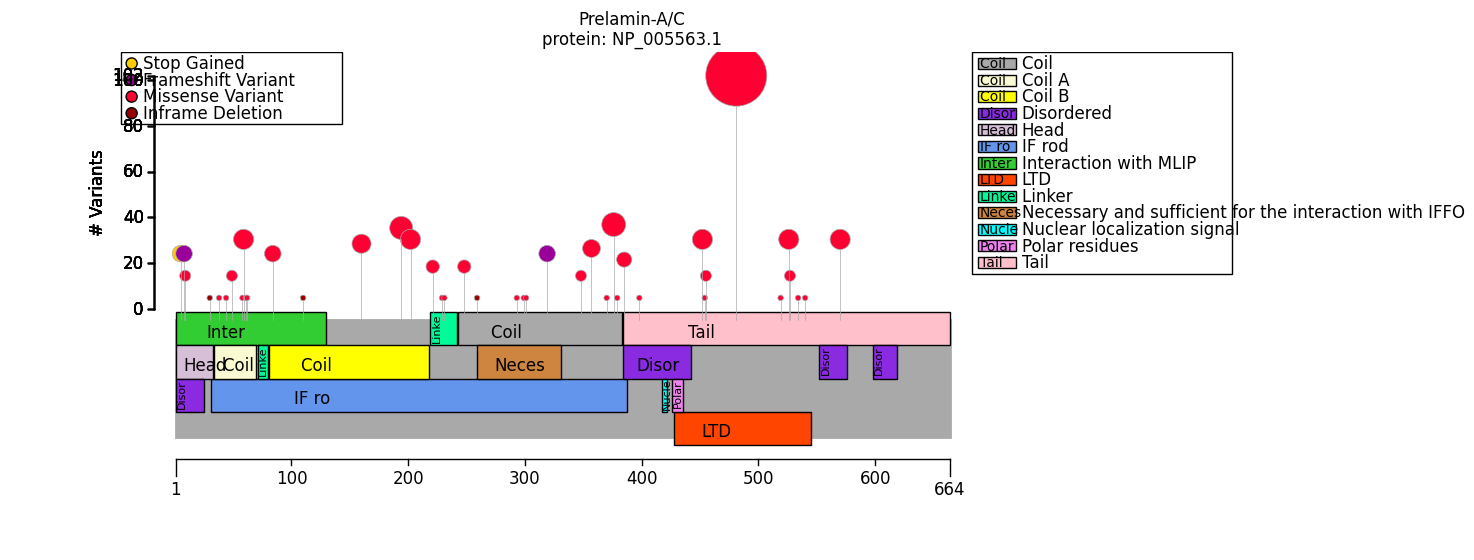

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

lmna_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
lmna_fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer

pviewer = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
pviewer.process(cohort)

Count,Name,Type,Coordinates,Variants
34,Interaction with MLIP,Region,2 - 130,p.Ile63Ser; p.Leu85Arg; p.Arg62Gly; p.Lys32del; p.Arg60Gly; p.Tyr45Cys; p.Asn39Ser; p.Thr10Ile; p.Arg50Pro; p.Gln6Ter; p.Glu112del; p.Leu59Val; p.Thr10AsnfsTer31
13,Head,Region,2 - 33,p.Gln6Ter; p.Lys32del; p.Thr10AsnfsTer31; p.Thr10Ile
12,Disordered,Region,2 - 25,p.Gln6Ter; p.Thr10AsnfsTer31; p.Thr10Ile
91,IF rod,Domain,32 - 387,p.Asp300Asn; p.Arg349Trp; p.Arg321GlufsTer159; p.Arg386Lys; p.Lys32del; p.Leu302Pro; p.Glu358Lys; p.Gly232Glu; p.Gln294Pro; p.Arg249Gln; p.Ile63Ser; p.Arg60Gly; p.Asp230Asn; p.Arg50Pro; p.Lys261del; p.Met371Lys; p.Leu59Val; p.Arg62Gly; p.Arg249Trp; p.Leu380Ser; p.His222Pro; p.Leu85Arg; p.Glu203Gly; p.Tyr45Cys; p.Asn39Ser; p.Glu161Lys; p.Arg377His; p.Asn195Lys; p.Glu112del
15,Coil 1A,Region,35 - 70,p.Ile63Ser; p.Arg62Gly; p.Arg60Gly; p.Tyr45Cys; p.Asn39Ser; p.Arg50Pro; p.Leu59Val
0,Linker 1,Region,72 - 80,
32,Coil 1B,Region,82 - 218,p.Leu85Arg; p.Glu203Gly; p.Glu161Lys; p.Asn195Lys; p.Glu112del
5,Linker 2,Region,220 - 242,p.Gly232Glu; p.Asp230Asn; p.His222Pro
34,Coil 2,Region,244 - 383,p.Asp300Asn; p.Arg349Trp; p.Arg249Trp; p.Arg377His; p.Arg321GlufsTer159; p.Leu302Pro; p.Glu358Lys; p.Leu380Ser; p.Gln294Pro; p.Arg249Gln; p.Lys261del; p.Met371Lys
9,Necessary and sufficient for the interaction with IFFO1,Region,260 - 331,p.Asp300Asn; p.Leu302Pro; p.Arg321GlufsTer159; p.Gln294Pro; p.Lys261del


In [7]:
from gpsea.view import CohortVariantViewer

viewer = CohortVariantViewer(tx_id=mane_tx_id)
viewer.process(cohort)


Count,Variant key,HGVS,Overlapping Exons,Effects
62,1_156136984_156136984_C_T,c.1444C>T (p.Arg482Trp),8,missense
36,1_156136985_156136985_G_A,c.1445G>A (p.Arg482Gln),8,missense
15,1_156138613_156138613_C_T,- (-),-,downstream of gene
12,1_156136094_156136094_G_A,c.1130G>A (p.Arg377His),6,missense
11,1_156134474_156134474_C_A,c.585C>A (p.Asn195Lys),3,missense
8,1_156115096_156115096_C_G,c.178C>G (p.Arg60Gly),1,missense
8,1_156137204_156137204_G_C,c.1580G>C (p.Arg527Pro),9,missense
8,1_156134497_156134497_A_G,c.608A>G (p.Glu203Gly),3,missense
8,1_156137756_156137756_C_A,c.1711C>A (p.Arg571Ser),10,missense
7,1_156130741_156130741_G_A,c.481G>A (p.Glu161Lys),2,missense


# Genotype-Phenotype Correlation (GPC) Analysis

In [8]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)

pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [9]:
from gpsea.model import VariantEffect
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.analysis.predicate import variant_effect
from gpsea.view import MtcStatsViewer

is_missense = variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)
missense_clf = monoallelic_classifier(
    a_predicate=is_missense,
    b_predicate=~is_missense,
    a_label="missense",
    b_label="other"
)

missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(missense_result)

Reason,Count
Skip terms if all counts are identical to counts for a child term,2
"Skipping ""general"" level terms",97
Skipping terms that are rare on the cohort level (in less than 40% of the cohort members),274


In [10]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group,missense,other,Corrected p values,p values
Loss of truncal subcutaneous adipose tissue [HP:0009002],104/104 (100%),4/11 (36%),2.862113e-07,7.531876e-09
Elevated hemoglobin A1c [HP:0040217],73/101 (72%),6/24 (25%),5.900694e-04,3.105628e-05
Distal muscle weakness [HP:0002460],33/88 (38%),3/24 (12%),2.865592e-01,2.552478e-02
Second degree atrioventricular block [HP:0011706],4/162 (2%),3/21 (14%),2.865592e-01,3.393795e-02
Atrioventricular block [HP:0001678],19/135 (14%),6/17 (35%),2.865592e-01,3.770516e-02
Pancreatitis [HP:0001733],14/105 (13%),4/12 (33%),5.305963e-01,8.803072e-02
Distal lower limb muscle weakness [HP:0009053],19/88 (22%),2/28 (7%),5.305963e-01,9.774142e-02
Third degree atrioventricular block [HP:0001709],4/162 (2%),2/21 (10%),5.910108e-01,1.418664e-01
Upper limb muscle weakness [HP:0003484],30/85 (35%),5/26 (19%),5.910108e-01,1.517795e-01
Proximal muscle weakness in upper limbs [HP:0008997],30/89 (34%),5/28 (18%),5.910108e-01,1.555292e-01


In [11]:
from gpsea.model.genome import Region
from gpsea.analysis.predicate import protein_region

# cardiac involvement in multisystem laminopathies prevails with mutations
# upstream of the nuclear localisation signal (NLS) (PMID:30402260)

in_upstream_nls = protein_region(region=Region(1, 416), tx_id=mane_tx_id) 

upstream_predicate = monoallelic_classifier(
    a_predicate=in_upstream_nls,
    b_predicate=~in_upstream_nls,
    a_label="Upstream of NLS",
    b_label="other"
)
upstream_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=upstream_predicate,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=upstream_result)

Allele group,Upstream of NLS,other,Corrected p values,p values
Lipodystrophy [HP:0009125],10/93 (11%),132/158 (84%),6.579230e-30,1.731376e-31
Dilated cardiomyopathy [HP:0001644],35/70 (50%),5/102 (5%),7.979551e-11,4.199764e-12
Atrioventricular block [HP:0001678],17/36 (47%),8/116 (7%),2.668508e-06,2.106717e-07
Foot joint contracture [HP:0008366],21/81 (26%),19/27 (70%),5.892409e-04,6.202536e-05
Lower-limb joint contracture [HP:0005750],22/82 (27%),19/27 (70%),6.233525e-04,8.202007e-05
Elbow contracture [HP:0034391],21/83 (25%),18/26 (69%),6.589480e-04,1.040444e-04
Upper-limb joint contracture [HP:0100360],21/81 (26%),18/26 (69%),6.659791e-04,1.226804e-04
Limb joint contracture [HP:0003121],23/83 (28%),19/27 (70%),8.139154e-04,1.713506e-04
Achilles tendon contracture [HP:0001771],21/85 (25%),19/30 (63%),1.016876e-03,2.663171e-04
Hip contracture [HP:0003273],4/83 (5%),9/26 (35%),1.016876e-03,2.675989e-04


In [12]:
from gpsea.analysis.pscore import CountingPhenotypeScorer
from gpsea.analysis.pscore.stats import MannWhitneyStatistic
from gpsea.analysis.pscore import PhenotypeScoreAnalysis

# The phenotype score counts the number of annotations per individual of the following
# two HPO terms or therio descendents. We use a dictionary so that we can
# also display the HPO labels, but the CountingPhenotypeScorer takes the HPO ids as input
cardiac_hpo = {
    "Dilated cardiomyopathy": "HP:0001644",
    "Atrial fibrillation": "HP:0005110",
}

scorer = CountingPhenotypeScorer.from_query_curies(hpo, cardiac_hpo.values())
score_stats = MannWhitneyStatistic()
score_analysis = PhenotypeScoreAnalysis(score_stats)
cardiac_score_results = score_analysis.compare_genotype_vs_phenotype_score(
    cohort, 
    upstream_predicate, 
    scorer
    )
cardiac_score_results.pval


1.82891236228034e-16

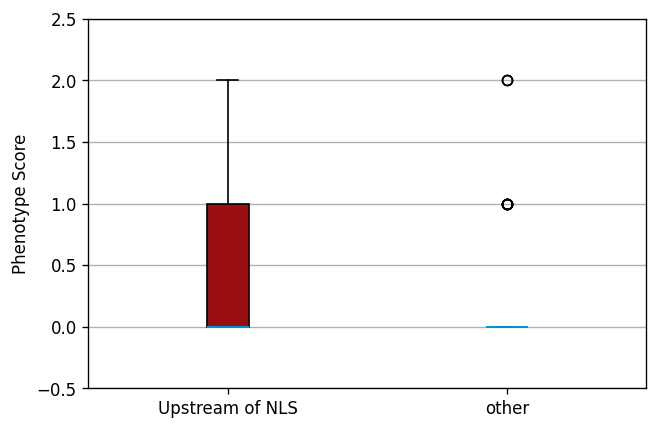

In [13]:
import matplotlib.pyplot as plt 

cardiac_fig, ax = plt.subplots(figsize = (6,4), dpi = 120)
cardiac_score_results.plot_boxplots( ax)
_= ax.grid(axis="y")
_= ax.set(ylabel="Phenotype Score", ylim=(-0.5, 2.5))

In [14]:

in_upstream_tail = protein_region(region=Region(1, 383), tx_id=mane_tx_id) 

upstream_tail_clf = monoallelic_classifier(
    a_predicate=in_upstream_tail,
    b_predicate=~in_upstream_tail,
    a_label="Upstream Tail (1-383)",
    b_label="other"
)
upstream_tail_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=upstream_tail_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=upstream_tail_result)


Allele group,Upstream Tail (1-383),other,Corrected p values,p values
Lipodystrophy [HP:0009125],9/88 (10%),133/163 (82%),6.522698e-28,1.716500e-29
Dilated cardiomyopathy [HP:0001644],35/69 (51%),5/103 (5%),4.185162e-11,2.202717e-12
Atrioventricular block [HP:0001678],17/35 (49%),8/117 (7%),1.504271e-06,1.187583e-07
Foot joint contracture [HP:0008366],17/77 (22%),23/31 (74%),6.364895e-06,6.699890e-07
Elbow contracture [HP:0034391],17/79 (22%),22/30 (73%),7.315784e-06,9.626031e-07
Upper-limb joint contracture [HP:0100360],17/77 (22%),22/30 (73%),8.429673e-06,1.364240e-06
Lower-limb joint contracture [HP:0005750],18/78 (23%),23/31 (74%),8.429673e-06,1.552834e-06
Limb joint contracture [HP:0003121],19/79 (24%),23/31 (74%),9.785594e-06,2.060125e-06
Achilles tendon contracture [HP:0001771],17/81 (21%),23/34 (68%),1.423119e-05,3.370544e-06
Hip contracture [HP:0003273],4/79 (5%),9/30 (30%),3.908257e-03,1.028489e-03


In [15]:
from gpsea.analysis.predicate import variant_key

gly608 = variant_key('1_156138613_156138613_C_T') # Gly608=, actually a splice variant

gly608_clf = monoallelic_classifier(
    a_predicate=gly608,
    b_predicate=~gly608,
    a_label="Gly608=",
    b_label="Other"
    )
gly608_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=gly608_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo, gly608_result)

Allele group,Gly608=,Other,Corrected p values,p values
Elevated hemoglobin A1c [HP:0040217],0/15 (0%),79/110 (72%),6.774402e-07,5.645335e-08
Muscle weakness [HP:0001324],0/15 (0%),63/124 (51%),3.641142e-04,6.068569e-05
Lipodystrophy [HP:0009125],15/15 (100%),127/236 (54%),7.472478e-04,1.868119e-04
Proximal muscle weakness [HP:0003701],0/15 (0%),53/114 (46%),1.088730e-03,3.629102e-04
Limb muscle weakness [HP:0003690],0/15 (0%),38/99 (38%),4.336571e-03,2.202778e-03
Distal muscle weakness [HP:0002460],0/15 (0%),36/97 (37%),4.336571e-03,2.361192e-03
Upper limb muscle weakness [HP:0003484],0/15 (0%),35/96 (36%),4.336571e-03,2.529666e-03
Proximal muscle weakness in upper limbs [HP:0008997],0/15 (0%),35/102 (34%),7.498586e-03,4.999057e-03
Proximal muscle weakness in lower limbs [HP:0008994],0/15 (0%),21/101 (21%),8.317148e-02,6.930957e-02
Distal lower limb muscle weakness [HP:0009053],0/15 (0%),21/101 (21%),8.317148e-02,6.930957e-02


# Summarize

In [16]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

f_results = (
  GPAnalysisResultSummary.from_multi( result=missense_result),
  GPAnalysisResultSummary.from_multi( result=upstream_result),
  GPAnalysisResultSummary.from_multi( result=upstream_tail_result),
  GPAnalysisResultSummary.from_multi( result=gly608_result), 
)
m_results = (
  GPAnalysisResultSummary.from_mono(cardiac_score_results),
)

caption = """Numerous LMNA genotype-phenotype correlations have been described. The literature is summarized in \\cite{PMID_32413188}."""
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=f_results,
                             mono_results=m_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [17]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

HPO Term,missense,other,p-val,adj. p-val
Loss of truncal subcutaneous adipose tissue [HP:0009002],104/104 (100%),4/11 (36%),7.53e-09,2.86e-07
Elevated hemoglobin A1c [HP:0040217],73/101 (72%),6/24 (25%),3.11e-05,5.90e-04
HPO Term,Upstream of NLS,other,p-val,adj. p-val
Lipodystrophy [HP:0009125],10/93 (11%),132/158 (84%),1.73e-31,6.58e-30
Pancreatitis [HP:0001733],4/7 (57%),14/110 (13%),0.011,0.033
Dilated cardiomyopathy [HP:0001644],35/70 (50%),5/102 (5%),4.20e-12,7.98e-11
Second degree atrioventricular block [HP:0011706],6/68 (9%),1/115 (1%),0.011,0.033
Atrioventricular block [HP:0001678],17/36 (47%),8/116 (7%),2.11e-07,2.67e-06
Achilles tendon contracture [HP:0001771],21/85 (25%),19/30 (63%),2.66e-04,0.001
Foot joint contracture [HP:0008366],21/81 (26%),19/27 (70%),6.20e-05,5.89e-04


In [18]:
summarizer.process_latex(report=report, protein_fig=lmna_fig)

Figure saved to ../../supplement/img/LMNA_protein_diagram-draft.pdf
Output to ../../supplement/tex/LMNA_summary_draft.tex
